In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


# EDA

In [3]:
data.sort_values(by=['Year'],ascending=True)

,Year,Price
53,2013,345000
52,2013,345000
50,2013,325000
73,2013,320000
81,2014,390000
...,...,...
10,2019,500000
99,2020,600000
98,2020,700000
39,2020,545000


In [4]:
data.shape

(112, 2)

In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
data.isna().sum()

Year     0
Price    0
dtype: int64

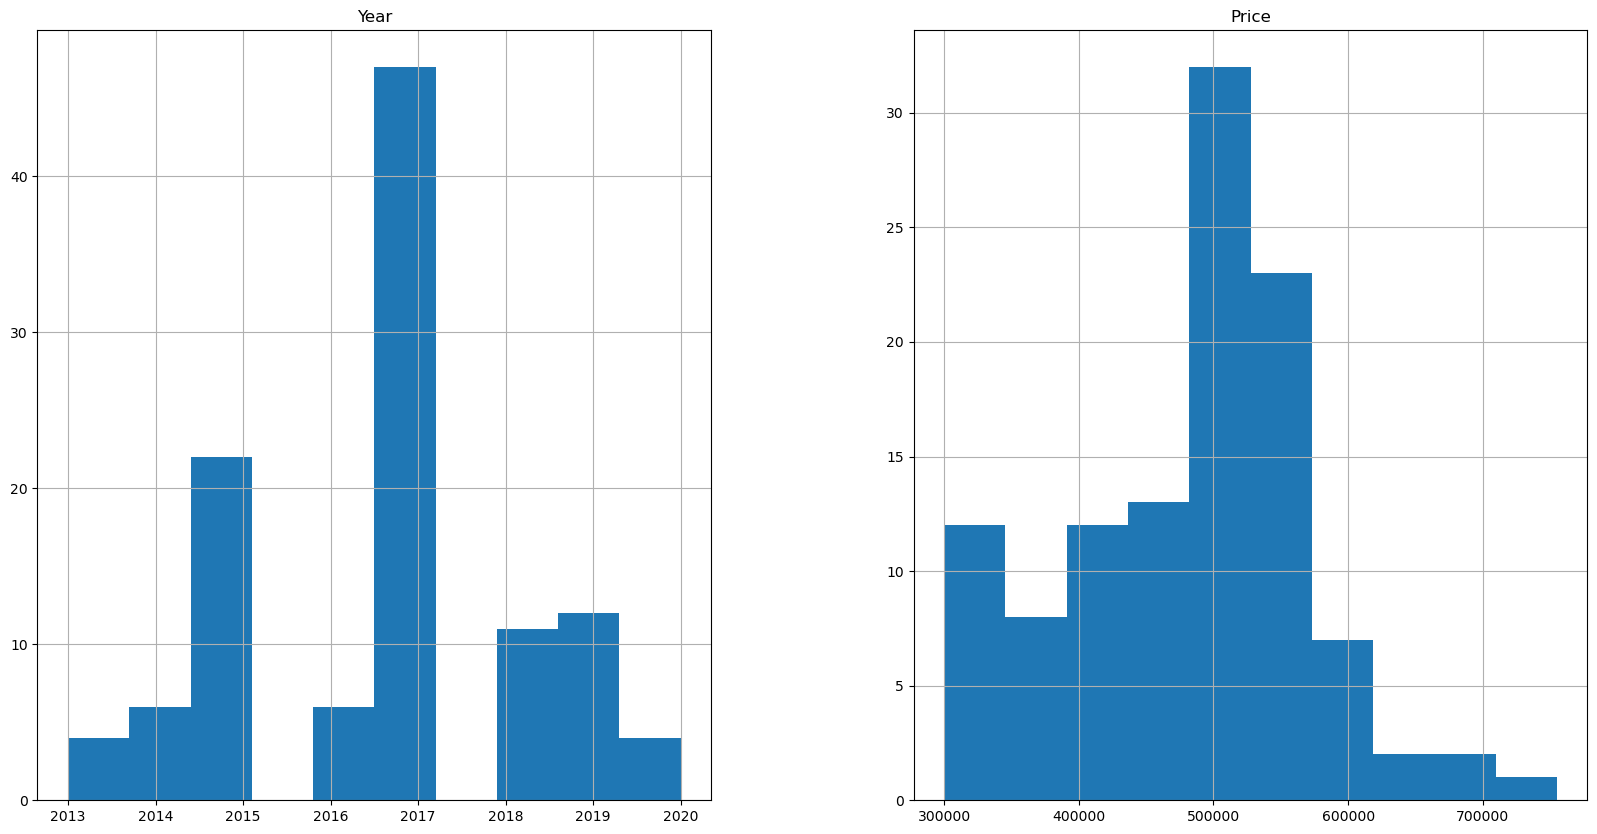

In [8]:
freqgraph = data.select_dtypes(include=['int'])
freqgraph.hist(figsize=(20,10))
plt.show()

In [9]:
data['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000], dtype=int64)

In [10]:
data['Price'].nunique() 

35

# Correlation

<AxesSubplot:>

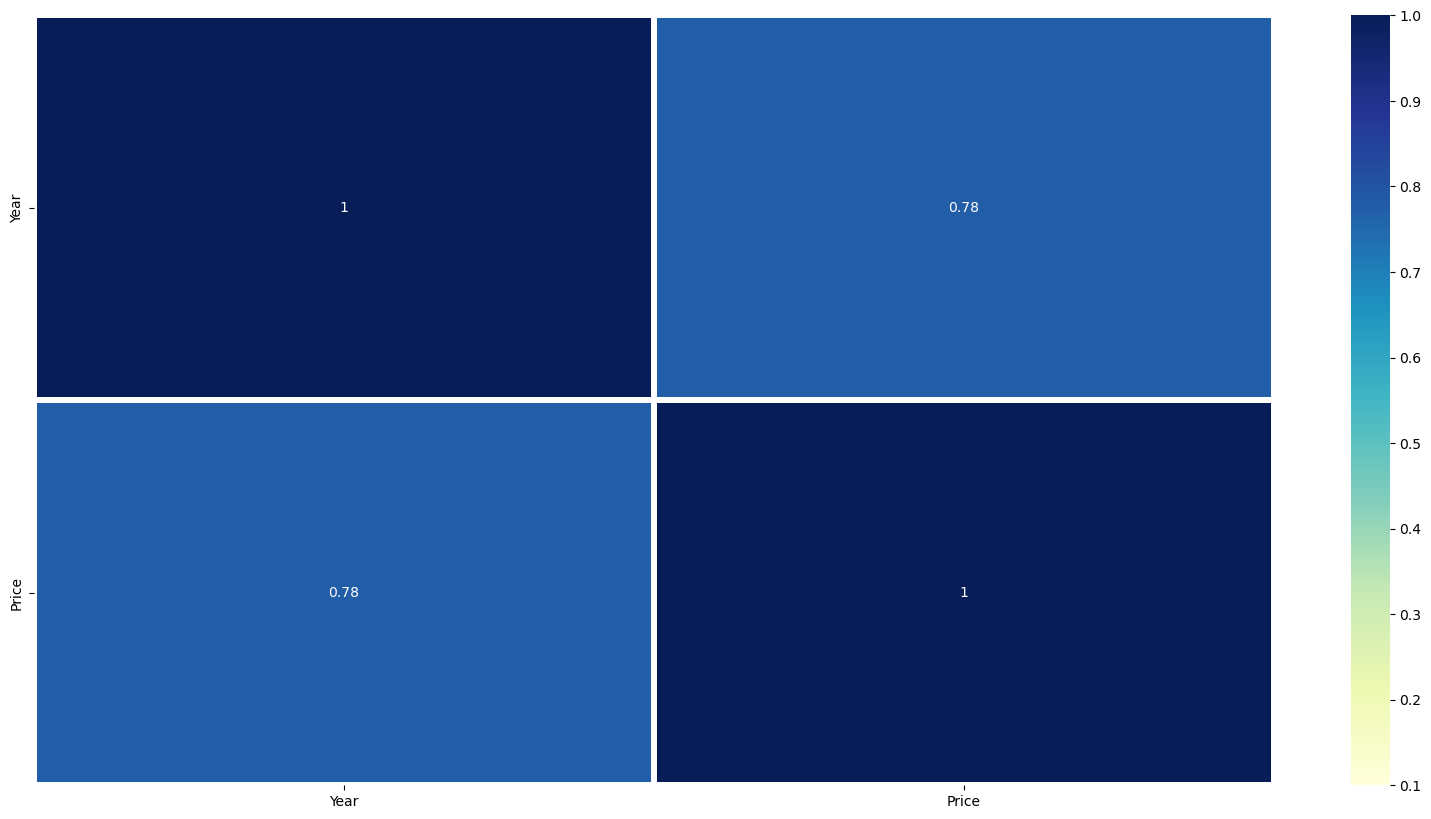

In [11]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,annot=True,vmin=0.1,vmax=1,linewidth=3,cmap='YlGnBu')

# Linear Regression

In [12]:
x = data['Year'].values.reshape(-1, 1)
y = data['Price'].values.reshape(-1, 1)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [14]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso
lr=linear_model.LinearRegression()

In [15]:
model = lr.fit(x_train,y_train)

In [17]:
y_pred = model.predict(x_test)
y_pred

array([[599223.07304102],
       [505265.04214995],
       [552244.05759549],
       [552244.05759549],
       [552244.05759549],
       [411307.01125886],
       [505265.04214995],
       [552244.05759549],
       [599223.07304102],
       [599223.07304102],
       [317348.98036776],
       [505265.04214995],
       [411307.01125886],
       [646202.08848657],
       [552244.05759549],
       [599223.07304102],
       [317348.98036776],
       [411307.01125886],
       [505265.04214995],
       [505265.04214995],
       [505265.04214995],
       [505265.04214995],
       [505265.04214995],
       [505265.04214995],
       [505265.04214995],
       [505265.04214995],
       [411307.01125886],
       [411307.01125886]])

In [18]:
from sklearn.metrics import mean_squared_error,r2_score
print('Linear Regression MSE is : ',mean_squared_error(y_test,y_pred))
print('Linear Regression R2 is : ',r2_score(y_test,y_pred))

Linear Regression MSE is :  3878767151.0731072
Linear Regression R2 is :  0.4347961632108521


# Lasso Regressin

In [19]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [20]:
y_pred_lasso = lasso.predict(x_test)
print("Lasso Regression Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression R2 score:", r2_score(y_test,y_pred_lasso))

Lasso Regression Mean Squared Error: 3878764025.5442586
Lasso Regression R2 score: 0.43479661865476726


# Prediction of Price using Linear Regression and Lasso Regression


In [21]:
price_2022 = lr.predict([[2022]])
print("Predicted price of car in the year 2022:", price_2022[0][0])

Predicted price of car in the year 2022: 740160.1193776578


In [22]:
price_2022_lasso = lasso.predict([[2022]])
print("Predicted price of a 2022 model  Lasso Regression:", price_2022_lasso[0])

Predicted price of a 2022 model  Lasso Regression: 740159.9031400383


# Comparison between Lasso Regression Mean squared Error and Linear regression mean squared error

In [23]:
print("Linear Regression Mean Squared Error:", mean_squared_error(y_test,y_pred))
print("Lasso Regression Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))

Linear Regression Mean Squared Error: 3878767151.0731072
Lasso Regression Mean Squared Error: 3878764025.5442586


# Comparison between Lasso Regression R2 squared value and Linear regression R2 squared value

In [24]:
print("Linear Regression R2 score:",r2_score(y_test,y_pred) )
print("Lasso Regression R2 score:", r2_score(y_test,y_pred_lasso))

Linear Regression R2 score: 0.4347961632108521
Lasso Regression R2 score: 0.43479661865476726


In [ ]:
#By comparing both regression method Lasso regression is more accurate and thus Lasso regression is better